<a href="https://colab.research.google.com/github/brianadit24/salary-clf/blob/master/SalariesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collect Data

In [13]:
!pip install -q kaggle

In [14]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                               title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
gpreda/covid19-tweets                                             COVID19 Tweets                                    22MB  2020-08-16 09:56:52           2211  
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  The Estonia Disaster Passenger List               14KB  2020-07-26 15:40:17            627  
futurecorporation/epitope-prediction                              COVID-19/SARS B-cell Epitope Prediction            1MB  2020-07-24 02:53:28            515  
Cornell-University/arxiv                                          arXiv Dataset                                    877MB  2020-08-14 23:50:57    

In [15]:
! kaggle competitions download -c sanbercode

  0% 0.00/809k [00:00<?, ?B/s]
100% 809k/809k [00:00<00:00, 55.7MB/s]
  0% 0.00/495k [00:00<?, ?B/s]
100% 495k/495k [00:00<00:00, 69.7MB/s]
  0% 0.00/32.0 [00:00<?, ?B/s]
100% 32.0/32.0 [00:00<00:00, 32.0kB/s]


In [16]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


# Read Data & EDA

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [86]:
train

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [87]:
test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,58,Pemerintah Negara,159021,9th,5,Menikah,Petani,Laki2,0.0,0.0,40.0
9595,45589,45,Pekerja Bebas Bukan Perusahan,144086,11th,7,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,50.0
9596,45590,20,Wiraswasta,238685,Pendidikan Tinggi,10,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,32.0
9597,45591,41,Pemerintah Lokal,249039,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,40.0


# Data Analysis

In [88]:
train.describe(include='all')

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,35994.000000,35994.000000,35994,3.599400e+04,35994,35994.000000,35994,35994,35994,3.599400e+04,3.599400e+04,35994.000000,35994
unique,NaN,NaN,9,NaN,16,NaN,6,15,2,NaN,NaN,NaN,2
top,NaN,NaN,Wiraswasta,NaN,SMA,NaN,Menikah,Spesialis,Laki2,NaN,NaN,NaN,<=7jt
freq,NaN,NaN,24948,NaN,11666,NaN,16559,4587,24094,NaN,NaN,NaN,27364
mean,17996.500000,38.664555,NaN,1.899318e+05,NaN,10.079874,NaN,NaN,NaN,1.503923e+07,1.217974e+06,40.435656,NaN
std,10390.717131,13.676266,NaN,1.058023e+05,NaN,2.574813,NaN,NaN,NaN,1.029919e+08,5.631544e+06,12.367552,NaN
min,0.000000,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000,NaN
25%,8998.250000,28.000000,NaN,1.177670e+05,NaN,9.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,40.000000,NaN
50%,17996.500000,37.000000,NaN,1.784665e+05,NaN,10.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,40.000000,NaN
75%,26994.750000,48.000000,NaN,2.379185e+05,NaN,12.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,45.000000,NaN


In [89]:
test.describe(include='all')

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,9599.000000,9599.000000,9599,9.599000e+03,9599,9599.000000,9599,9599,9599,9.599000e+03,9.599000e+03,9599.000000
unique,NaN,NaN,9,NaN,16,NaN,6,15,2,NaN,NaN,NaN
top,NaN,NaN,Wiraswasta,NaN,SMA,NaN,Menikah,Perbaikan Kerajinan,Laki2,NaN,NaN,NaN
freq,NaN,NaN,6714,NaN,3090,NaN,4333,1205,6380,NaN,NaN,NaN
mean,40793.000000,38.447234,NaN,1.899967e+05,NaN,10.052610,NaN,NaN,NaN,1.489018e+07,1.252762e+06,40.330868
std,2771.136951,13.782397,NaN,1.064186e+05,NaN,2.548354,NaN,NaN,NaN,1.041154e+08,5.714041e+06,12.398919
min,35994.000000,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000
25%,38393.500000,28.000000,NaN,1.166200e+05,NaN,9.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,40.000000
50%,40793.000000,37.000000,NaN,1.778580e+05,NaN,10.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,40.000000
75%,43192.500000,48.000000,NaN,2.379975e+05,NaN,12.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,45.000000


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [92]:
print('***** Train *****')
print(pd.isnull(train).sum())
print('\n***** Test *****')
print(pd.isnull(test).sum())

***** Train *****
id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

***** Test *****
id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64


# Data Cleaning

In [93]:
display(sorted(train['Pekerjaan'].unique()))
display(sorted(test['Pekerjaan'].unique()))
display(sorted(train['Kelas Pekerja'].unique()))
display(sorted(test['Kelas Pekerja'].unique()))
display(sorted(train['Pendidikan'].unique()))
display(sorted(test['Pendidikan'].unique()))

['?',
 'Asisten Rumah Tangga',
 'Ekesekutif Managerial',
 'Mesin Inspeksi',
 'Pembersih',
 'Pemuka Agama',
 'Penjaga',
 'Perbaikan Kerajinan',
 'Petani',
 'Sales',
 'Servis Lainnya',
 'Spesialis',
 'Supir',
 'Tech-support',
 'Tentara']

['?',
 'Asisten Rumah Tangga',
 'Ekesekutif Managerial',
 'Mesin Inspeksi',
 'Pembersih',
 'Pemuka Agama',
 'Penjaga',
 'Perbaikan Kerajinan',
 'Petani',
 'Sales',
 'Servis Lainnya',
 'Spesialis',
 'Supir',
 'Tech-support',
 'Tentara']

['?',
 'Pekerja Bebas Bukan Perusahan',
 'Pekerja Bebas Perusahaan',
 'Pemerintah Lokal',
 'Pemerintah Negara',
 'Pemerintah Provinsi',
 'Tanpa di Bayar',
 'Tidak Pernah Bekerja',
 'Wiraswasta']

['?',
 'Pekerja Bebas Bukan Perusahan',
 'Pekerja Bebas Perusahaan',
 'Pemerintah Lokal',
 'Pemerintah Negara',
 'Pemerintah Provinsi',
 'Tanpa di Bayar',
 'Tidak Pernah Bekerja',
 'Wiraswasta']

['10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'D3',
 'D4',
 'Doktor',
 'Master',
 'Pendidikan Tinggi',
 'SD',
 'SMA',
 'Sarjana',
 'Sekolah Professional']

['10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'D3',
 'D4',
 'Doktor',
 'Master',
 'Pendidikan Tinggi',
 'SD',
 'SMA',
 'Sarjana',
 'Sekolah Professional']

In [94]:
# Replace ? with NaN
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

In [95]:
# clean up the mess
print("All empty and NA values on Train:")
for i in train.columns:
    nas = sum(train[i].isnull())
    if nas>0:
        print(i," ", nas)
print("*********************************")
print("All empty and NA values on Test:")
for i in test.columns:
    nas = sum(test[i].isnull())
    if nas>0:
        print(i," ", nas)

All empty and NA values on Train:
Kelas Pekerja   2063
Pekerjaan   2069
*********************************
All empty and NA values on Test:
Kelas Pekerja   552
Pekerjaan   554


In [96]:
# # Fill NaN with Values
# train['Pekerjaan'].fillna(value=(train['Pekerjaan'].value_counts().idxmax()), inplace=True)
# test['Pekerjaan'].fillna(value=(test['Pekerjaan'].value_counts().idxmax()), inplace=True)
# train['Kelas Pekerja'].fillna(value=(train['Kelas Pekerja'].value_counts().idxmax()), inplace=True)
# test['Kelas Pekerja'].fillna(value=(test['Kelas Pekerja'].value_counts().idxmax()), inplace=True)

# Drop NaN
train = train.dropna()
test = test.dropna()

In [97]:
# Convert Categories to Numerics
kelaspekerja_mapp = {"Pekerja Bebas Bukan Perusahan":2, "Pekerja Bebas Perusahaan":3,
                     "Pemerintah Lokal":5, "Pemerintah Negara":7, "Pemerintah Provinsi":6,
                     "Tanpa di Bayar":1, "Tidak Pernah Bekerja":0, "Wiraswasta":4}
pendidikan_mapp = {'10th':2, '11th':2, '12th':2, '1st-4th':0, '5th-6th':0, '7th-8th':1, '9th':1,
                   'D3':3, 'D4':4, 'Doktor':7, 'Master':6, 'Pendidikan Tinggi':4,
                   'SD':0, 'SMA':2, 'Sarjana':4, 'Sekolah Professional':5}
statuskawin_mapp = {"Belum Pernah Menikah":0, "Menikah":1, "Cerai":2, "Janda":2, "Menikah LDR":3, "Berpisah":2}
pekerjaan_mapp = {"Asisten Rumah Tangga":0, "Ekesekutif Managerial":1, "Mesin Inspeksi":2, "Pembersih":3, "Pemuka Agama":4, 
                  "Penjaga":5, "Perbaikan Kerajinan":6, "Petani":7, "Sales":8, "Servis Lainnya":9, 
                  "Spesialis":10, "Supir":11, "Tech-support":12, "Tentara":13}
kelamin_mapp = {"Laki2":0, "Perempuan":1}
gaji_mapp = {'<=7jt':0, '>7jt':1}

train['Kelas Pekerja'] = train['Kelas Pekerja'].map(kelaspekerja_mapp)
test['Kelas Pekerja'] = test['Kelas Pekerja'].map(kelaspekerja_mapp)

train['Pendidikan'] = train['Pendidikan'].map(pendidikan_mapp)
test['Pendidikan'] = test['Pendidikan'].map(pendidikan_mapp)

train['Status Perkawinan'] = train['Status Perkawinan'].map(statuskawin_mapp)
test['Status Perkawinan'] = test['Status Perkawinan'].map(statuskawin_mapp)

train['Pekerjaan'] = train['Pekerjaan'].map(pekerjaan_mapp)
test['Pekerjaan'] = test['Pekerjaan'].map(pekerjaan_mapp)

train['Jenis Kelamin'] = train['Jenis Kelamin'].map(kelamin_mapp)
test['Jenis Kelamin'] = test['Jenis Kelamin'].map(kelamin_mapp)

train['Gaji'] = train['Gaji'].map(gaji_mapp)

In [98]:
train

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,4,242912,2,9,0,9,1,0.0,0.0,35.0,0
1,1,49,4,140782,2,6,2,1,1,0.0,0.0,40.0,0
2,2,44,4,120057,3,12,1,1,0,61404000.0,0.0,45.0,1
3,3,24,4,194630,4,13,0,10,0,0.0,0.0,35.0,0
4,4,33,4,219619,6,14,1,10,0,210336000.0,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,2,148169,2,9,1,6,0,0.0,0.0,40.0,0
35990,35990,69,3,264722,3,12,1,8,0,0.0,0.0,40.0,1
35991,35991,24,2,31606,4,13,1,10,1,0.0,0.0,20.0,1
35992,35992,47,4,197836,2,9,1,8,0,0.0,0.0,45.0,0


In [99]:
test

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,5,99761,4,11,2,4,1,0.0,0.0,40.0
1,35995,28,4,202206,2,9,1,2,0,0.0,0.0,50.0
2,35996,34,6,199934,4,10,1,4,0,0.0,0.0,40.0
3,35997,51,4,373448,4,10,1,1,0,0.0,28028000.0,40.0
5,35999,51,4,137815,4,10,1,4,0,102172000.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,58,7,159021,1,5,1,7,0,0.0,0.0,40.0
9595,45589,45,2,144086,2,7,1,6,0,0.0,0.0,50.0
9596,45590,20,4,238685,4,10,0,9,1,0.0,0.0,32.0
9597,45591,41,5,249039,2,9,2,4,1,0.0,0.0,40.0


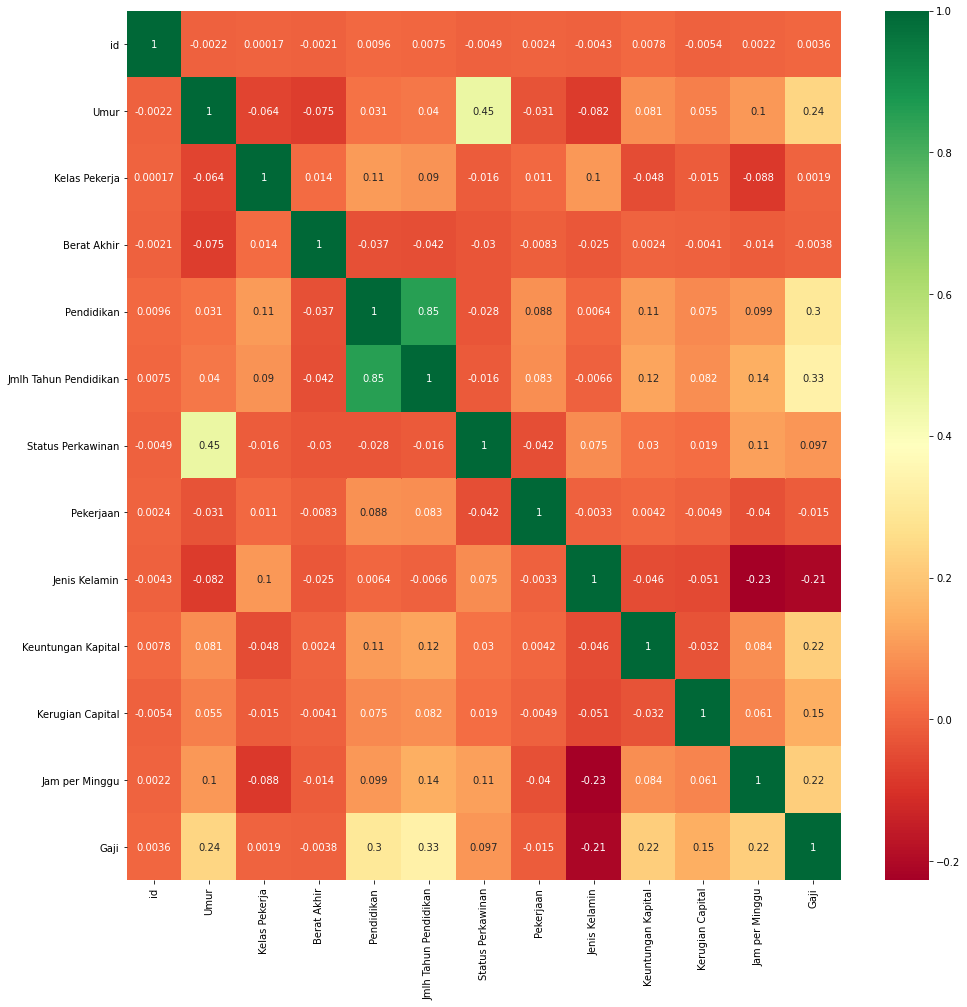

In [100]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

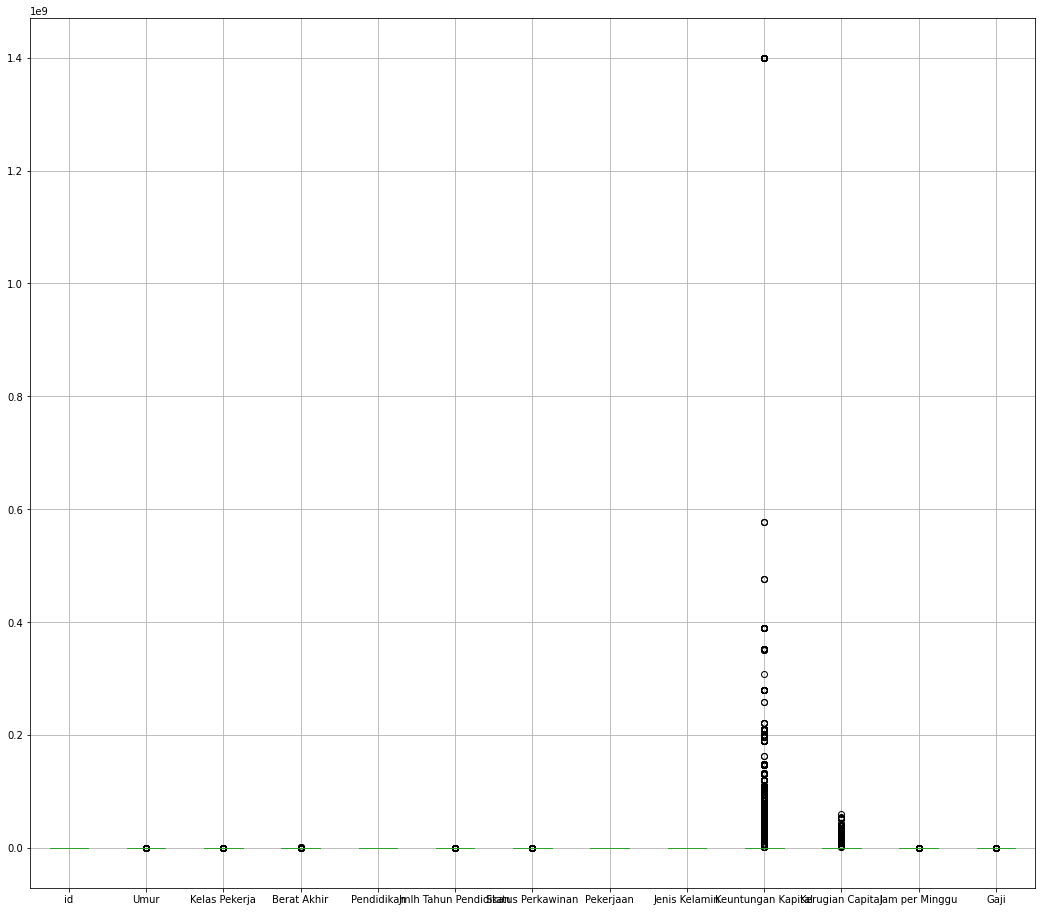

In [101]:
plt.figure(figsize=(18,16))
train.boxplot()

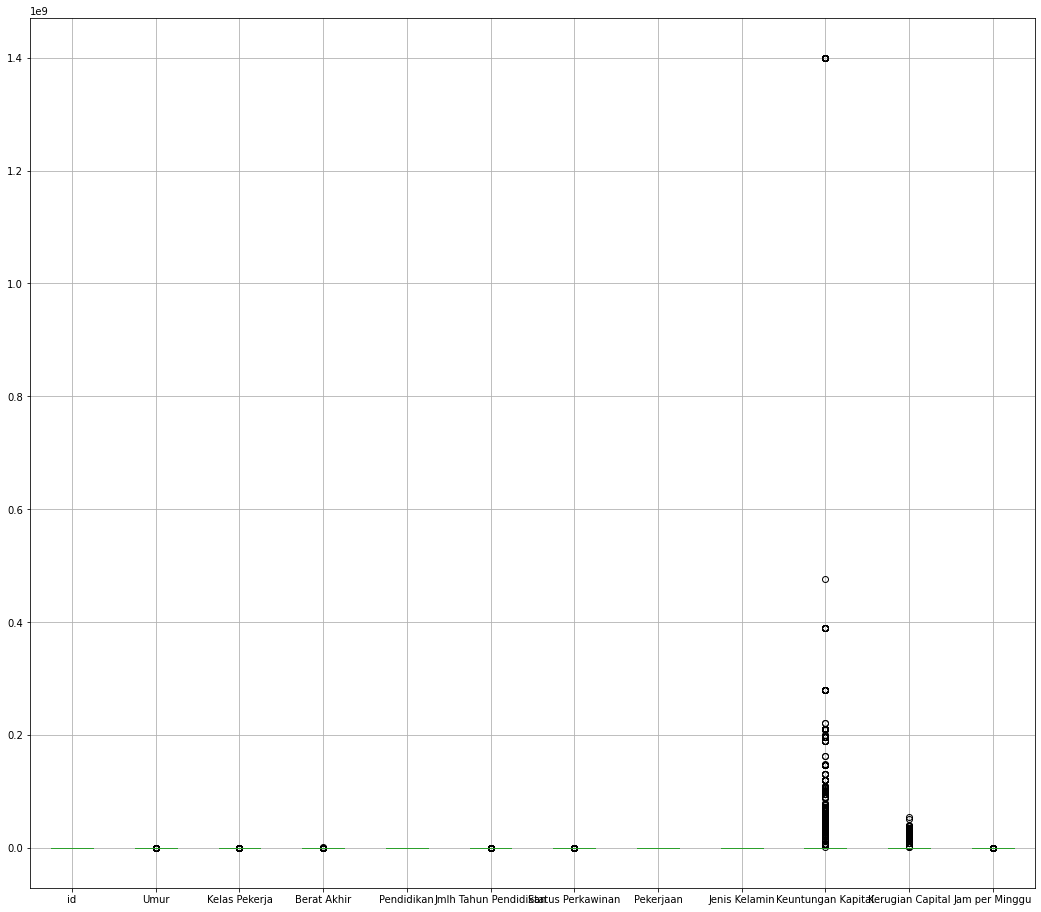

In [102]:
plt.figure(figsize=(18,16))
test.boxplot()

In [103]:
def normalized(x):
  return (x - x.min()) / (x.max() - x.min())

train[['Keuntungan Kapital', 'Kerugian Capital', 'Berat Akhir']] = train[['Keuntungan Kapital', 'Kerugian Capital', 'Berat Akhir']].apply(normalized)
test[['Keuntungan Kapital', 'Kerugian Capital', 'Berat Akhir']] = test[['Keuntungan Kapital', 'Kerugian Capital', 'Berat Akhir']].apply(normalized)
display(train)
display(test)

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,4,0.155338,2,9,0,9,1,0.000000,0.0,35.0,0
1,1,49,4,0.086187,2,6,2,1,1,0.000000,0.0,40.0,0
2,2,44,4,0.072154,3,12,1,1,0,0.043860,0.0,45.0,1
3,3,24,4,0.122647,4,13,0,10,0,0.000000,0.0,35.0,0
4,4,33,4,0.139567,6,14,1,10,0,0.150242,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,2,0.091188,2,9,1,6,0,0.000000,0.0,40.0,0
35990,35990,69,3,0.170105,3,12,1,8,0,0.000000,0.0,40.0,1
35991,35991,24,2,0.012265,4,13,1,10,1,0.000000,0.0,20.0,1
35992,35992,47,4,0.124818,2,9,1,8,0,0.000000,0.0,45.0,0


,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,5,0.059648,4,11,2,4,1,0.000000,0.000000,40.0
1,35995,28,4,0.130708,2,9,1,2,0,0.000000,0.000000,50.0
2,35996,34,6,0.129132,4,10,1,4,0,0.000000,0.000000,40.0
3,35997,51,4,0.249488,4,10,1,1,0,0.000000,0.513333,40.0
5,35999,51,4,0.086044,4,10,1,4,0,0.072981,0.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,45588,58,7,0.100753,1,5,1,7,0,0.000000,0.000000,40.0
9595,45589,45,2,0.090393,2,7,1,6,0,0.000000,0.000000,50.0
9596,45590,20,4,0.156011,4,10,0,9,1,0.000000,0.000000,32.0
9597,45591,41,5,0.163193,2,9,2,4,1,0.000000,0.000000,40.0


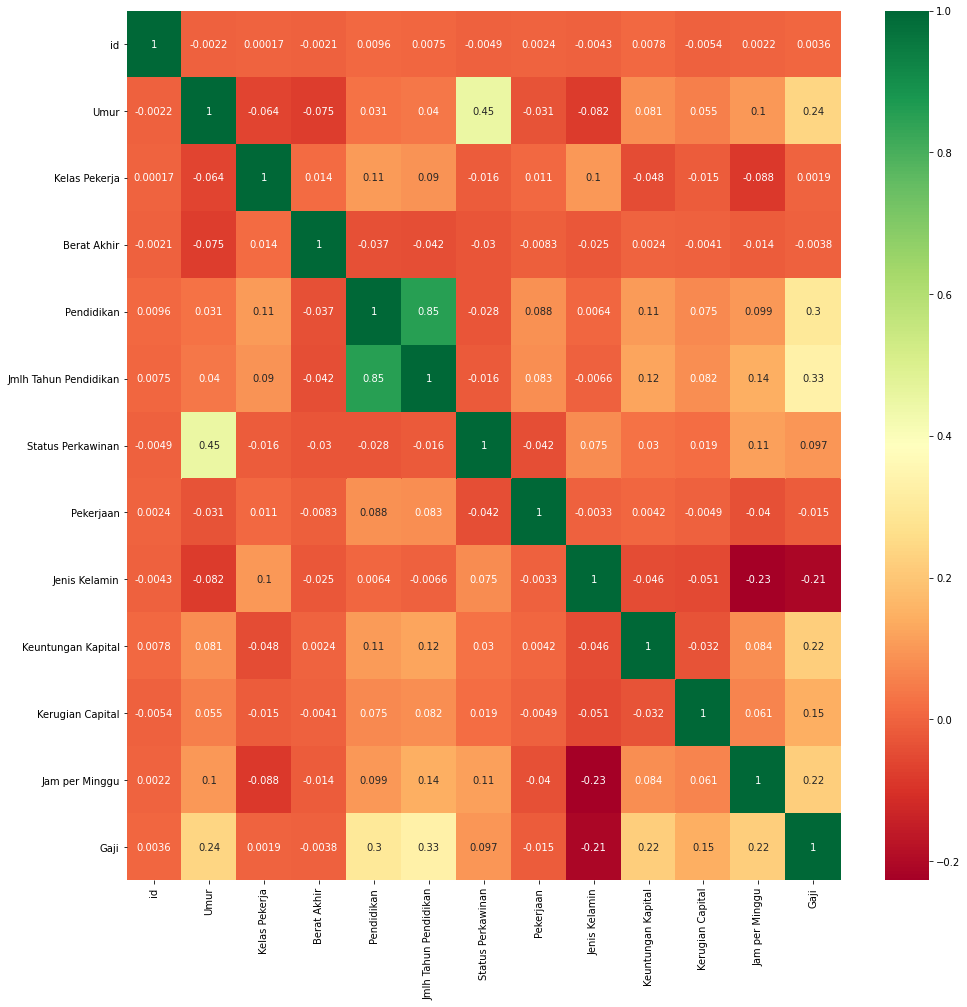

In [104]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

# Training Model

In [105]:
from sklearn.model_selection import train_test_split

features = train.drop(['Gaji', 'id'], axis=1)
target = train['Gaji']
train_x = train.drop(['Gaji', 'id'], axis=1)
train_y = train['Gaji']
test_x = test.drop(['id'], axis=1)
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size = 0.22, random_state = 0)

In [106]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.32


In [107]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.65


In [108]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

79.9


In [109]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

79.98


In [110]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

75.98


In [140]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(max_depth=20)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

86.08


In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

78.44


In [114]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.6


In [124]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbk = GradientBoostingClassifier(max_depth=5, loss='exponential', criterion='friedman_mse', warm_start=True)
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
auc_gbk = cross_val_score(gbk ,x_val, y_val, cv=5, scoring='roc_auc').mean()
print(acc_gbk)
print(auc_gbk)

87.47
0.9158404400685345


In [119]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC','Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Gradient Boosting Classifier,87.47
3,Random Forest,85.26
2,Logistic Regression,80.65
4,Naive Bayes,80.32
6,Linear SVC,79.98
0,Support Vector Machines,79.90
7,Stochastic Gradient Descent,78.60
1,KNN,78.44
5,Perceptron,75.98


In [120]:
#set ids as PassengerId and predict survival 
ids = test['id']
datatest = test.drop(['id'], axis=1)
predictions = gbk.predict(datatest)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'id' : ids, 'Gaji': predictions })
output.to_csv('sanbersubmission11.csv', index=False)